In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [11]:
cheyenne_ref1 = xr.open_mfdataset('/glade/campaign/cgd/tss/people/czarakas/CoupledPPE/'+
                             'offline_simulations/OFFL0000_PI_v02/'+
                             'lnd/hist/*.h0.0119*.nc', combine='by_coords')
cheyenne_ref2 = xr.open_mfdataset('/glade/campaign/cgd/tss/people/czarakas/CoupledPPE/'+
                             'offline_simulations/OFFL0000_PI_v02/'+
                             'lnd/hist/*.h0.0129*.nc', combine='by_coords')

In [20]:
cheyenne_increaseTBOT=xr.open_mfdataset('//glade/campaign/cgd/tss/people/czarakas/CoupledPPE/'+
                                        'offline_sensitivity_tests/OFFL0000_PI_increaseTbot_02/'+
                             'lnd/hist/*.h0.*.nc', combine='by_coords')


In [21]:
derecho_increaseTBOT = xr.open_mfdataset('/glade/derecho/scratch/czarakas/archive/OFFL0000_PI_SOM_increaseTBOT1deg_derecho/'+
                         'lnd/hist/*.h0.*.nc', combine='by_coords')
derecho_ref=xr.open_mfdataset('/glade/derecho/scratch/czarakas/archive/OFFL0000_PI_SOM_testDerecho_02/'+
                         'lnd/hist/*.h0.*.nc', combine='by_coords')

In [22]:
var_to_check='EFLX_LH_TOT'

In [28]:
cheyenne_increaseTBOT_var=cheyenne_increaseTBOT[var_to_check]
cheyenne_ref1_var=cheyenne_ref1[var_to_check]
cheyenne_ref2_var=cheyenne_ref2[var_to_check]
cheyenne_ref_var=xr.concat([cheyenne_ref1_var, cheyenne_ref2_var],dim='time')
derecho_increaseTBOT_var=derecho_increaseTBOT[var_to_check]
derecho_ref_var=derecho_ref[var_to_check]

In [29]:
derecho_mean_diff=(derecho_increaseTBOT_var.mean(dim='time')-
                   derecho_ref_var.mean(dim='time'))
cheyenne_mean_diff=(cheyenne_increaseTBOT_var.mean(dim='time')-
                   cheyenne_ref_var.mean(dim='time'))

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


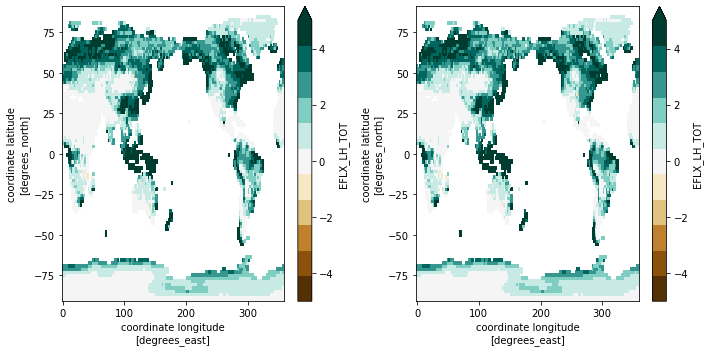

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cheyenne_mean_diff.plot(cmap=plt.get_cmap('BrBG',11),vmax=5)
plt.subplot(1,2,2)
derecho_mean_diff.plot(cmap=plt.get_cmap('BrBG',11),vmax=5)
plt.tight_layout()

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


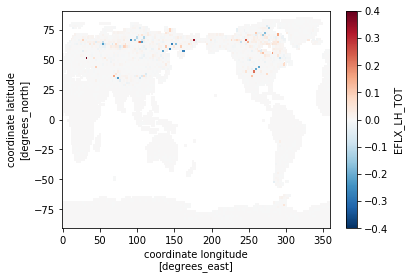

In [39]:
(cheyenne_mean_diff-derecho_mean_diff).plot(vmax=0.4)

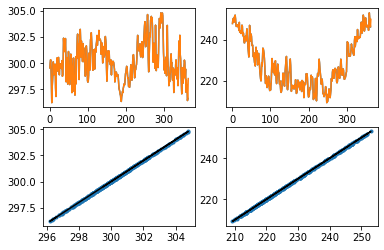

In [7]:
var_to_check='TBOT'
plt.subplot(2,2,1)
plt.plot(ds_old[var_to_check][1:,45,10])
plt.plot(ds_new[var_to_check][:,45,10])
plt.subplot(2,2,2)
plt.plot(ds_old[var_to_check][1:,0,0])
plt.plot(ds_new[var_to_check][:,0,0])
plt.subplot(2,2,3)
plt.plot(ds_old[var_to_check][1:,45,10],ds_new[var_to_check][:-1,45,10],'.')
plt.plot(ds_old[var_to_check][1:,45,10],ds_old[var_to_check][1:,45,10],'-k')
plt.subplot(2,2,4)
plt.plot(ds_old[var_to_check][1:,0,0],ds_new[var_to_check][:-1,0,0],'.')
plt.plot(ds_old[var_to_check][1:,0,0],ds_old[var_to_check][1:,0,0],'-k')

In [19]:
var_to_check='EFLX_LH_TOT'
diff_mean=ds_new[var_to_check][:-1,:,:].mean(dim='time')-ds_old[var_to_check][1:,:,:].mean(dim='time')
diff_mean_pct=diff_mean*100/ds_old[var_to_check][1:,:,:].mean(dim='time')

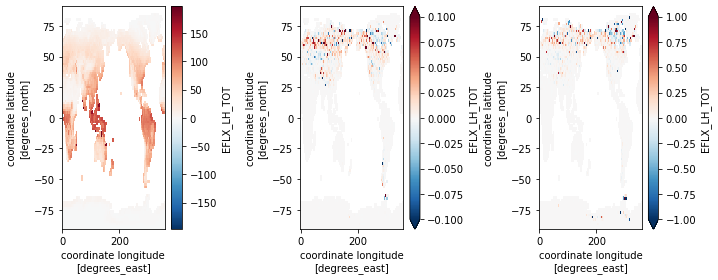

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
(ds_old[var_to_check][1:,:,:].mean(dim='time')).plot()#vmax=100)
plt.subplot(1,3,2)
diff_mean.plot(vmax=0.1)
plt.subplot(1,3,3)
diff_mean_pct.plot(vmax=1)
plt.tight_layout()

In [15]:
diff=(ds_new.FCTR[:,:,:]-ds_old.FCTR[1:,:,:])

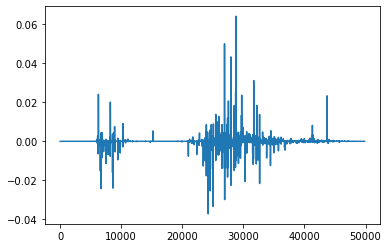

In [41]:
ds_new = xr.open_dataset('/glade/derecho/scratch/czarakas/archive/OFFL0000_PI_SOM_testDerecho_02/lnd/hist/'+
                         'OFFL0000_PI_SOM_testDerecho_02.clm2.h2.0129-02-01-00000.nc')
ds_old=xr.open_dataset('/glade/campaign/cgd/tss/people/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/hist/'+
                       'OFFL0000_PI_v02.clm2.h2.0129-02-01-00000.nc')
ind=1
plt.plot((ds_new.GPP[ind,:]-ds_old.GPP[ind,:])*86400)

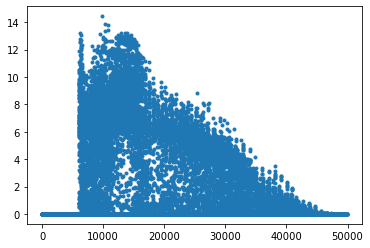

In [43]:
plt.plot(ds_new.GPP[ind,:]*86400,'.')

In [44]:
ds_new = xr.open_dataset('/glade/derecho/scratch/czarakas/archive/OFFL0000_PI_SOM_testDerecho_02/lnd/hist/'+
                         'OFFL0000_PI_SOM_testDerecho_02.clm2.h0.0129-02-01-00000.nc')
ds_old=xr.open_dataset('/glade/campaign/cgd/tss/people/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/hist/'+
                       'OFFL0000_PI_v02.clm2.h0.0129-02-01-00000.nc')

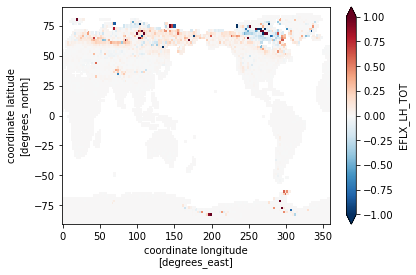

In [52]:
(diff_mean*100/ds_old.EFLX_LH_TOT.mean(dim='time')).plot(vmax=1)

In [48]:
diff_mean=ds_new.EFLX_LH_TOT.mean(dim='time')-ds_old.EFLX_LH_TOT.mean(dim='time')

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
ds_old.GPP

<xarray.DataArray 'GPP' (time: 120, pft: 49832)>
[5979840 values with dtype=float32]
Coordinates:
  * time     (time) object 0119-02-01 00:00:00 ... 0129-01-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean